### 2. Data Understanding
2.1. [Data Collection](#2.1-bullet)

2.2. [Data Description](#2.2-bullet)
  
2.3. [Data Wrangling](#2.3-bullet)

2.4. [Exploratory Data Analysis](#2.4-bullet)

2.5. [Verify Data Quality](#2.5-bullet)

---------------------------------------------------------

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#### Handling missing values functions

In [2]:
# Convert string to numeric values
def str2num(value):
    try:
        return int(value)
    except ValueError:
        return value

# Convert nan values to int
def nan2int(value):
    if pd.isnull(value):
        return 0
    return value

## 2. Data Understanding  <a class="anchor" id="2-bullet"></a>
### 2.1. Data Collection  <a class="anchor" id="2.1-bullet"></a>
The datasets includes Amazon Software product reviews and meta data Software product collected from https://jmcauley.ucsd.edu/data/amazon/ or http://snap.stanford.edu/data/web-Amazon.html. Accessed date: 01 February 2022.

The datasets then were downloaded and stored in ***/Dataset*** local folder.

In [3]:
# Load data
df_raw = pd.read_json('Dataset/Software.json', lines=True)
df_meta_raw = pd.read_json('Dataset/meta_Software.json', lines=True)

### 2.2. Data Description  <a class="anchor" id="2.2-bullet"></a>
The datasets includes two files:
- **Software.json** - Amazon Software product reviews includes 459,436 reviews in JSON format (300 MB)
- **meta_Software.json** - meta data includes meta data of 26,815 products in JSON format (70 MB)

##### Software.json sample data

{"overall": 4.0, "verified": true, "reviewTime": "03 11, 2014", "reviewerID": "A240ORQ2LF9LUI", "asin": "0077613252", "style": {"Format:": " Loose Leaf"}, "reviewerName": "Michelle W", "reviewText": "The materials arrived early and were in excellent condition.  However for the money spent they really should've come with a binder and not just loose leaf.", "summary": "Material Great", "unixReviewTime": 1394496000}
{"overall": 4.0, "verified": true, "reviewTime": "02 23, 2014", "reviewerID": "A1YCCU0YRLS0FE", "asin": "0077613252", "style": {"Format:": " Loose Leaf"}, "reviewerName": "Rosalind White Ames", "reviewText": "I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me  of my human sexuality classwork.", "summary": "Health", "unixReviewTime": 1393113600}


##### meta_Software.json sample data
{"category": [], "tech1": "", "description": ["", "<b>Latin rhythms that will get your kids singing in Spanish</b>", "<i>Sing, Watch, and Learn Spanish</i> helps your kids ages four through eight take a giant step in learning Spanish by combining two time-honored methods kids have always used to develop their language skills: Imitating other kids and singing along with simple melodies. This charming DVD contains 16 music videos featuring kids engaged in fun activities, from visiting animals at the zoo to comparing clothing sizes in grandmas closet.", "Each video features an original song of authentic Latin rhythms that gets kids singing along with the children on screen. As they watch, listen, and sing along, kids absorb 300 Spanish words, each of which is shouted out in a song and displayed as a subtitle on screen.", "", "", ""], "fit": "", "title": "Sing, Watch, &amp; Learn Spanish (DVD + Guide): 16 Fun Music Videos to Introduce Your Child to Spanish", "also_buy": [], "tech2": "", "brand": "McGraw Hill", "feature": [], "rank": "15,792 in Software (", "also_view": [], "main_cat": "Software", "similar_item": "", "date": "</div>", "price": "", "asin": "0071480935", "imageURL": ["https://images-na.ssl-images-amazon.com/images/I/51BtLn2-L-L._SX38_SY50_CR,0,0,38,50_.jpg"], "imageURLHighRes": ["https://images-na.ssl-images-amazon.com/images/I/51BtLn2-L-L.jpg"]}

#### 2.2.1. Software Product Reviews data

In [4]:
# Product Reviews sample
df_raw.head(3)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN


In [5]:
# Product review data summary
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         459436 non-null  int64 
 1   verified        459436 non-null  bool  
 2   reviewTime      459436 non-null  object
 3   reviewerID      459436 non-null  object
 4   asin            459436 non-null  object
 5   style           234401 non-null  object
 6   reviewerName    459412 non-null  object
 7   reviewText      459370 non-null  object
 8   summary         459380 non-null  object
 9   unixReviewTime  459436 non-null  int64 
 10  vote            127853 non-null  object
 11  image           1508 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 39.0+ MB


As we can see in the summary result, there are several columns having null values need to be resolved, especially reviewText, vote.

##### Software Product Reviews Description:
- **overall**: rating of the product (1,2,3,4,5)
- **verified**: verification status (True of False)
- **reviewTime**: time of the review (mm dd, yyyy), e.g. 03 11, 2014
- **reviewerID**: ID of the reviewer, e.g. A240ORQ2LF9LUI
- **asin**: Product ID, e.g. 0077613252
- **style**: a disctionary of the product metadata, e.g., "Format" is "Loose Leaf"
- **reviewerName**: name of the reviewer
- **reviewText**: text of the review
- **summary**: summary of the review
- **unixReviewTime**: time of the review (in unix time format)
- **vote**: votes of the review
- **image**: images that users post after they have received the product

#### 2.2.2. Product meta data

In [6]:
# Product metadata sample
df_meta_raw.head(3)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],,HOLT. RINEHART AND WINSTON,[],"25,550 in Software (",[],Software,,</div>,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120,[],[],NaN
1,[],,"[, <b>Latin rhythms that will get your kids si...",,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill,[],"15,792 in Software (",[],Software,,</div>,,0071480935,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,[],,[<b>Connect is the only integrated learning sy...,,Connect with LearnSmart Access Card for Microb...,[],,McGraw-Hill Science/Engineering/Math,[],"16,900 in Software (",[],Software,,</div>,,007329506X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [7]:
# Product metadata summary
df_meta_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26790 entries, 0 to 26789
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         26790 non-null  object
 1   tech1            26790 non-null  object
 2   description      26790 non-null  object
 3   fit              26790 non-null  object
 4   title            26790 non-null  object
 5   also_buy         26790 non-null  object
 6   tech2            26790 non-null  object
 7   brand            26790 non-null  object
 8   feature          26790 non-null  object
 9   rank             26790 non-null  object
 10  also_view        26790 non-null  object
 11  main_cat         26790 non-null  object
 12  similar_item     26790 non-null  object
 13  date             26790 non-null  object
 14  price            26790 non-null  object
 15  asin             26790 non-null  object
 16  imageURL         26790 non-null  object
 17  imageURLHighRes  26790 non-null

##### Product metadata Description:
- **category**: category of the product
- **tech1**: the first technical detail table of the product
- **description**: description of the product
- **fit**: Unknown
- **title**: product title
- **also_buy**: the list of products were bought together
- **tech2**: the second technical detail table of the product
- **brand**: product brand name
- **feature**: bullet-point format features of the product
- **rank**: sales rank information
- **also_view**: the products were view by the same customer
- **main_cat**: the main category - Software
- **similar_item**: text of the review
- **date**: Unknown
- **price**: price of the product
- **asin**: Product ID, e.g. 0030672120
- **image_URL**: url of the product image
- **imageURLHighRes**: url of the high resolution product image
- **details**: details

### 2.3. Data Wrangling  <a class="anchor" id="2.3-bullet"></a>
##### Before doing Exploratory Data Analysis (EDA), This Data Wrangling part will do the followings:
1. Drop unnecessary columns and transform some columns into two raw datasets. In more detail:
- **overall rating, reviewTime, reviewerID, asin, reviewText, summary, vote** will be retained in Product review dataset. 
- **reviewText** and **summary** columns will be concatenated to the only one new **reviewFull** column
- **category, brand, title, asin** will be kept in Product metadata dataset

##### Product Review
2. Find and remove duplicated rows based on asin, reviewFull, reviewTime, and reviewerID in Product Review data set
3. **vote** with NaN value will be transformed to numerical value = 0
4. **reviewTime** will be transformed to Date type

##### Product metadata
5. Find and remove duplicated rows based on asin in Product metadata
6. Remove special characters
7. Update product category

##### Merge
8. Merge two datasets into a new one using asin (product key)
- Handle nan values
- Add a new feature **reviewLength**

#### 1. Drop unnecessary columns and transform some columns

In [8]:
# select only necessary columns in product review and rename some columns
df_product = df_raw[['overall','reviewerID','reviewTime','asin','reviewText','summary','vote']].copy()
df_product = df_product.rename({'overall':'rating'}, axis='columns').copy()

# concatenate reviewText and summary column 
df_product['reviewFull'] = df_product[['reviewText','summary']].apply(lambda x: ''.join(str(y) for y in x if str(y) !='nan'), axis = 1)
df_product = df_product.drop(columns=['reviewText','summary'], axis=1).copy()

# select only necessary columns in product metadata
df_meta = df_meta_raw[['category','brand','title','asin']].copy()
df_meta = df_meta.rename({'title':'product'}, axis='columns').copy()


#### 2. Find and remove duplicated rows based on asin, reviewFull, reviewTime, and reviewerID in Product Review data set

In [9]:
# Find duplicated rows
df_product[df_product.duplicated(['reviewerID','asin','reviewFull','reviewTime'], keep=False)].sort_values(by=['reviewerID','asin'])

,rating,reviewerID,reviewTime,asin,vote,reviewFull
57559,3,A0823528HTX8UO6IPJ4V,"05 15, 2016",B0014ZQMXO,NaN,it is 2016 and the sofware has to be better th...
66065,3,A0823528HTX8UO6IPJ4V,"05 15, 2016",B0014ZQMXO,NaN,it is 2016 and the sofware has to be better th...
301024,5,A1000SU5PFV1EQ,"10 7, 2016",B00S8TYVCI,NaN,"THE BEST PRODUCT AND SERVICE! REPAIR, RESTORE ..."
301025,5,A1000SU5PFV1EQ,"10 7, 2016",B00S8TYVCI,NaN,"THE BEST PRODUCT AND SERVICE! REPAIR, RESTORE ..."
52866,4,A1004703RC79J9,"07 16, 2009",B000WR2F2M,NaN,I've read some not-so-positive reviews about M...
...,...,...,...,...,...,...
59133,3,AZWSFFD4ZQ29X,"07 10, 2011",B000VJTL1Y,NaN,Powerful product - if you either take classes ...
56619,4,AZXGPM8EKSHE9,"04 5, 2010",B0014KJ6EQ,6,I too will review this product using the actua...
65125,4,AZXGPM8EKSHE9,"04 5, 2010",B0014KJ6EQ,6,I too will review this product using the actua...
58778,5,AZYPEP2CT1LUC,"03 8, 2009",B0017KEA6W,7,For less than a hundred $$$ and my eeemachine ...


In [10]:
# Remove duplicated rows based on asin, reviewFull, reviewTime, and reviewerID. Keep the first rows
df_product = df_product.drop_duplicates(['reviewerID','asin','reviewFull','reviewTime'], keep='first')

#### 3. Transform NaN helpful votes to numerical value = 0

In [11]:
#-- 3. Transform NaN helpful votes to numerical value = 0
df_product.vote = df_product.vote.str.replace(',','')
df_product.vote = df_product.vote.apply(nan2int)
df_product.vote = pd.to_numeric(df_product.vote, downcast="integer")

#### 4. Transform reviewTime to datetime

In [12]:
#-- 4. Transform reviewTime to datetime
df_product['reviewTime'] = df_product.reviewTime.str.replace(',','')
df_product['reviewTime'] = pd.to_datetime(df_product['reviewTime'], format = '%m %d %Y')

#### 5. Find and remove duplicated rows based on asin in Product metadata

In [13]:
# Find duplicated rows based on asin in Product metadata
df_meta[df_meta.duplicated(subset=['asin'], keep=False)].sort_values(by=['asin'])

,category,brand,product,asin
877,"[Software, Children's, Games, </span></span></...",by\n \n SET Enterprises Inc.,SET: The Computer Game - PC/Mac,B00000IV94
6028,"[Software, Children's, Games, </span></span></...",by\n \n SET Enterprises Inc.,SET: The Computer Game - PC/Mac,B00000IV94
6029,"[Software, Children's, Games, </span></span></...",by\n \n LucasArts,Star Wars Episode 1: The Gungan Frontier - PC/Mac,B00000IWIZ
878,"[Software, Children's, Games, </span></span></...",by\n \n LucasArts,Star Wars Episode 1: The Gungan Frontier - PC/Mac,B00000IWIZ
879,"[Software, Education &amp; Reference, Maps &am...",Magellan,Magellan DataSend CD-ROM,B00000J0GM
...,...,...,...,...
6025,"[Software, Children's, Early Learning]",The Learning Company,Yukon Trail,B0005MYHMU
6027,"[Software, Children's, Early Learning]",Learning Company,Storybook Weaver Deluxe,B0005MYI4W
11178,"[Software, Children's, Early Learning]",Learning Company,Storybook Weaver Deluxe,B0005MYI4W
6026,"[Software, Children's]",The Learning Company,Africa Trail,B0005MYJ0A


In [14]:
# Remove duplicated rows based on asin. Keep the first rows
df_meta = df_meta.drop_duplicates(['asin'], keep='first')

#### 6. Replace special characters

In [15]:
#-- 6. Replace special characters
df_meta['product'] = df_meta['product'].str.replace('&amp;', '&')
df_meta['brand'] = df_meta['brand'].str.replace('&amp;', '&')
df_meta['brand'] = df_meta['brand'].str.replace(r'by\n','', regex=True).str.strip()
df_meta['brand'] = df_meta['brand'].str.replace('The','')

#### 7. Update product category to single category

In [16]:
#-- 7. Update product category to single category
df_meta['category'] = df_meta['category'].apply(lambda x: x[1] if x else 'Unknown')
df_meta['category'] = df_meta['category'].str.replace('&amp;', '&')

#### 8. Merge to one new product review data 

In [17]:
#-- 8. Merge to one new product review data 
review2 = pd.merge(df_product,df_meta,on='asin',how='left')

#### Verify

In [18]:
# Check nan values
review2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450863 entries, 0 to 450862
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      450863 non-null  int64         
 1   reviewerID  450863 non-null  object        
 2   reviewTime  450863 non-null  datetime64[ns]
 3   asin        450863 non-null  object        
 4   vote        450863 non-null  int16         
 5   reviewFull  450863 non-null  object        
 6   category    450540 non-null  object        
 7   brand       450540 non-null  object        
 8   product     450540 non-null  object        
dtypes: datetime64[ns](1), int16(1), int64(1), object(6)
memory usage: 31.8+ MB


##### As we can see here, after cleaning, removing duplicated rows, and merging two datasets, we still have some null values in category, brand and product columns. We will handle these null values.

In [19]:
# Replace nan values with 'Unknown' string
review2[['category', 'brand', 'product']] = review2[['category', 'brand', 'product']].fillna('Unknown')

In [20]:
# Add more columns reviewLength, reviewYear, rename reviewFull column, and arrange the column order
review2['reviewYear'] = review2['reviewTime'].dt.year
review2['reviewLength'] = review2['reviewFull'].str.len()
review2 = review2.rename({'reviewFull':'reviewText'}, axis='columns').copy()
review2 = review2[['rating','reviewerID','reviewTime','reviewYear','asin','vote','reviewText','reviewLength','category','brand','product']].copy()

In [21]:
# Verify nan values
review2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450863 entries, 0 to 450862
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   rating        450863 non-null  int64         
 1   reviewerID    450863 non-null  object        
 2   reviewTime    450863 non-null  datetime64[ns]
 3   reviewYear    450863 non-null  int64         
 4   asin          450863 non-null  object        
 5   vote          450863 non-null  int16         
 6   reviewText    450863 non-null  object        
 7   reviewLength  450863 non-null  int64         
 8   category      450863 non-null  object        
 9   brand         450863 non-null  object        
 10  product       450863 non-null  object        
dtypes: datetime64[ns](1), int16(1), int64(3), object(6)
memory usage: 38.7+ MB


##### Now, we have a pretty good dataset with 450863 records for EDA. And here is the final review data sample

In [22]:
# Final Review data sample
review2.head(3)

,rating,reviewerID,reviewTime,reviewYear,asin,vote,reviewText,reviewLength,category,brand,product
0,4,A240ORQ2LF9LUI,2014-03-11,2014,0077613252,0,The materials arrived early and were in excell...,169,Unknown,McGraw-Hill Humanities/Social Sciences/Languages,Connect Personal Health with LearnSmart 1 Seme...
1,4,A1YCCU0YRLS0FE,2014-02-23,2014,0077613252,0,I am really enjoying this book with the worksh...,173,Unknown,McGraw-Hill Humanities/Social Sciences/Languages,Connect Personal Health with LearnSmart 1 Seme...
2,1,A1BJHRQDYVAY2J,2014-02-17,2014,0077613252,7,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",312,Unknown,McGraw-Hill Humanities/Social Sciences/Languages,Connect Personal Health with LearnSmart 1 Seme...


### !!! Hoorey !!! Review data is ready for EDA now !!!! 

### 2.4. Exploratory Data Analysis  <a class="anchor" id="2.4-bullet"></a>
In this part, we will explore below information:
- The number of reviews by rating
- The number of votes by rating
- The number of reviews by year
- Top 10 most reviewed brands, categories, products
- Top 10 most 5-star rated brands, categories, products
- The correlation between rating, vote, and reviewLength


##### 1. The number of reviews by rating

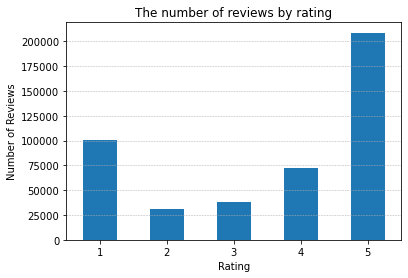

5-star rating held the highest number of reviews, followed by 1-star.
The customer are the straight reviewers, aren't they?
It seems to be like if they were happy then 5-star, if not, 1-star.


In [23]:
review2['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('The number of reviews by rating')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylabel('Number of Reviews')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()
print ("5-star rating held the highest number of reviews, followed by 1-star.")
print ("The customer are the straight reviewers, aren't they?")
print ("It seems to be like if they were happy then 5-star, if not, 1-star.")

##### 2. The number of votes by rating

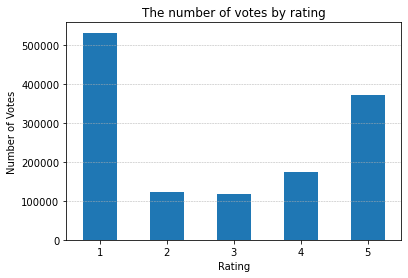

However, 1-star rating held the highest number of votes.
The number was seen much higher than 5-star, standing at the 2nd position.
It is seems to be like a lot of customers had the same bad experience 


In [24]:
review2.groupby('rating')['vote'].sum().sort_index().plot(kind='bar')
plt.title('The number of votes by rating')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.ylabel('Number of Votes')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()
print ("However, 1-star rating held the highest number of votes.")
print ("The number was seen much higher than 5-star, standing at the 2nd position.") 
print ("It is seems to be like a lot of customers had the same bad experience ")

##### 2. The number of reviews by year

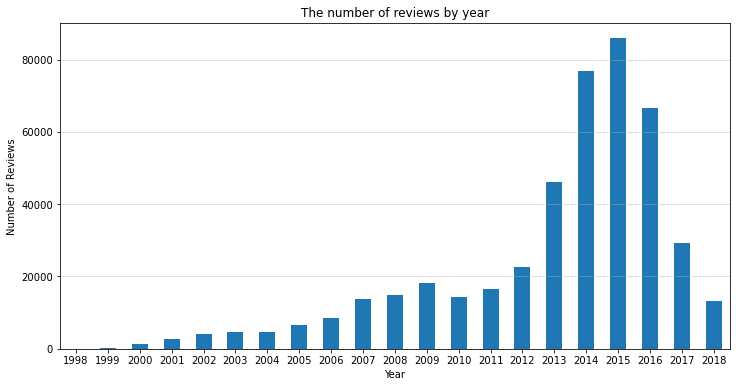

The reviews was increasing remarkly from 2013 to 2016
It will be very helpful if we have sales data here to investigate this interesting point.


In [25]:
plt.figure(figsize=(12,6))
review2['reviewYear'].value_counts().sort_index().plot(kind='bar')
plt.title('The number of reviews by year')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Reviews')
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()
print ("The reviews was increasing remarkly from 2013 to 2016")
print ("It will be very helpful if we have sales data here to investigate this interesting point.")

##### 4. Top 10 most reviewed brands

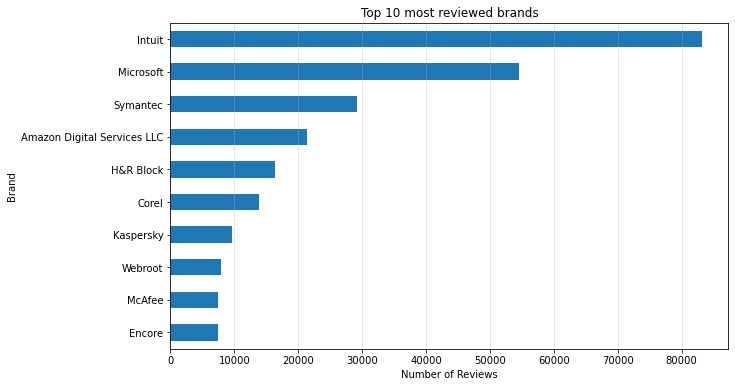

Intuit, Microsoft and Symantec are the top brands having highest number of reviews
We will see whether they were the brands getting most 5-star ratings


In [26]:
brands = review2['brand'].value_counts()
plt.figure(figsize=(10,6))
brands[:10].sort_values().plot(kind='barh')
plt.title('Top 10 most reviewed brands')  
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
print ("Intuit, Microsoft and Symantec are the top brands having highest number of reviews")
print ("We will see whether they were the brands getting most 5-star ratings")

##### 5. Top 10 most 5-star rated brands

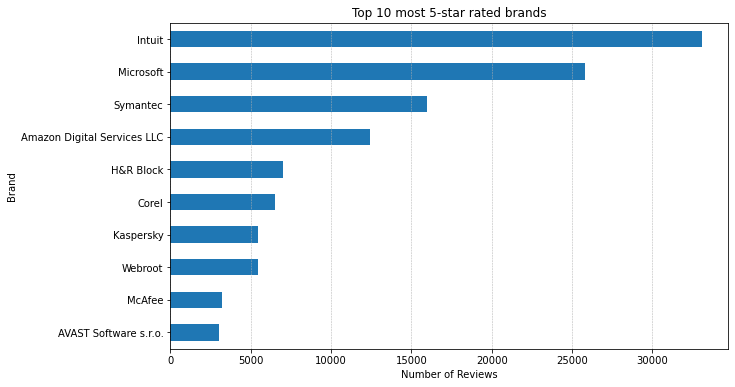

Oh yes, Intuit,Microsoft and Symantec are the top 3 brands having most 5-star ratings


In [27]:
brands = review2[review2['rating']==5]['brand'].value_counts()
plt.figure(figsize=(10,6))
brands[:10].sort_values().plot(kind='barh')
plt.title('Top 10 most 5-star rated brands')  
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
print ("Oh yes, Intuit,Microsoft and Symantec are the top 3 brands having most 5-star ratings")

##### 5. Top 10 most reviewed categories

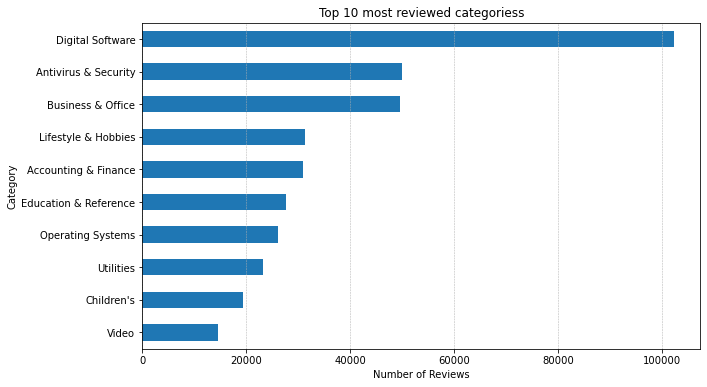

Digital Software, Antivirus & Security, and Business % Office are top 3 product categories getting most reviews


In [28]:
categories = review2[review2.category != 'Unknown']['category'].value_counts()
plt.figure(figsize=(10,6))
categories[:10].sort_values().plot(kind='barh')
plt.title('Top 10 most reviewed categoriess')  
plt.xlabel('Number of Reviews')
plt.ylabel('Category')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
print ("Digital Software, Antivirus & Security, and Business % Office are top 3 product categories getting most reviews")

##### 6. Top 10 most reviewed products

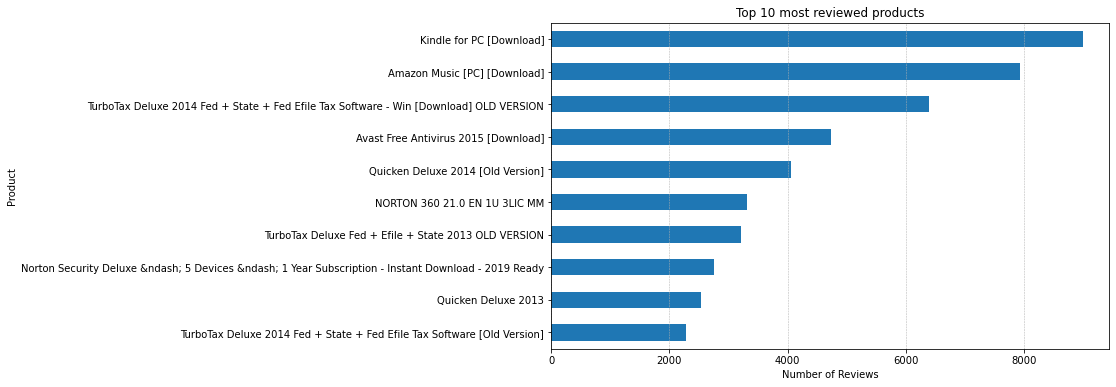

And Kindle for PC, Amazon Music PC, and Turbotax are top products getting reviews


In [29]:
products = review2['product'].value_counts()
plt.figure(figsize=(10,6))
products[:10].sort_values().plot(kind='barh')
plt.title('Top 10 most reviewed products')  
plt.xlabel('Number of Reviews')
plt.ylabel('Product')
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()
print ("And Kindle for PC, Amazon Music PC, and Turbotax are top products getting reviews")

##### 7. Correlation between rating, vote and reviewLength

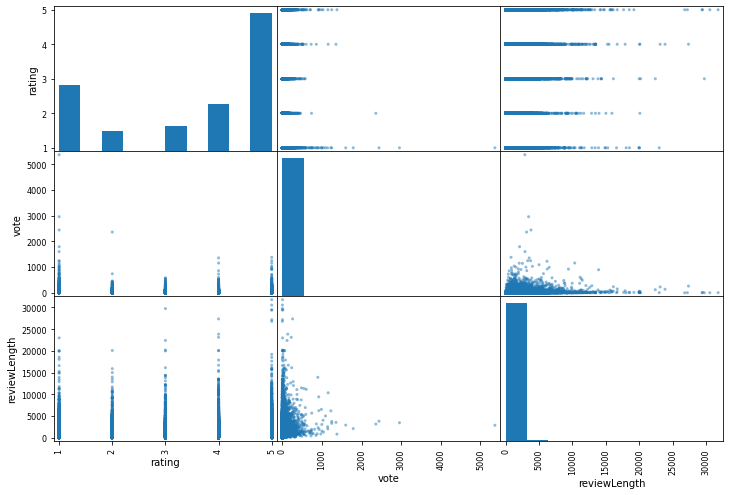

There was no clear correlation between rating and vote except 1-star rating had the highest number of votes
There was also no clear correlation between rating and review length except 5-star and 4-star, had the longest reviews
However, there was a correlation between vote and review length. Customers seems to vote for shorter reviews rather than longer ones 


In [30]:
# This line of code takes around 15-20s to complete
attributes = ["rating", "vote", "reviewLength"]
scatter_matrix(review2[attributes], figsize=(12, 8))
plt.show()
print ("There was no clear correlation between rating and vote except 1-star rating had the highest number of votes")
print ("There was also no clear correlation between rating and review length except 5-star and 4-star, had the longest reviews")
print ("However, there was a correlation between vote and review length. Customers seems to vote for shorter reviews rather than longer ones ")

### 2.5. Verify Data Quality  <a class="anchor" id="2.5-bullet"></a>
We completed the EDA step with several interesting insights. In this project, we focus on reviewText and rating for rating classification prediction. Therefore, in the last step of the Data Understanding phase, we will verify the data quality of these columns.

In [31]:
# Missing reviewText values 
review2['reviewText'].isnull().sum()

0

In [32]:
# Isna reviewText values
review2['reviewText'].isna().sum()

0

In [33]:
# Missing rating values 
review2['rating'].isnull().sum()

0

In [34]:
# isna rating values
review2['rating'].isna().sum()

0

In [35]:
# View full reviewText
pd.set_option('display.max_colwidth', None)
review2.loc[:,['rating','reviewText']]

,rating,reviewText
0,4,The materials arrived early and were in excellent condition. However for the money spent they really should've come with a binder and not just loose leaf.Material Great
1,4,"I am really enjoying this book with the worksheets that make you review your goals, what to do when you do not make it, it reminds me of my human sexuality classwork.Health"
2,1,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR MONEY ON THIS SO CALLED BOOK! $140.00 FOR A ""BOOK"" THAT ISIN'T EVEN BOUND LOOSE LEAFS, THAT I HAD TO PROVIDE MY OWN BINDER FOR. TURNS OUT YOU CAN BUY ACCESS TO THE BOOK AT MCGRAW HILL CONNECT CORE FOR $70.00\n\nTHIS BOOK IS A COMPLETE WASTE OF MONEY!ARE YOU KIDING ME?"
3,3,This book was missing pages!!! Important pages. I couldn't answer some test questions because of it!! I have never had this happen before.missing pages!!
4,5,"I have used LearnSmart and can officially say that this is an amazing study tool that quickly and simply adapts to your style of learning. You can access it at anytime and it is on the go! Once you start using LearnSmart you will quickly realize that this is the best way to learn and study.\n\nI am a business student and I did not use LearnSmart for my Accounting I class, however, I did use it for my Accounting II class. The grade difference from Accounting I to Accounting II was a whole letter grade... thanks to LearnSmart!\n\nEvery college student should definitely check it out!Best study product out there!"
...,...,...
450858,2,No instructions.....No Help unless you want to PAY for helpTwo Stars
450859,1,it's a jokeOne Star
450860,5,I have multiple licenses of the Antivirus. I have been using for over 2 years and have found this quite effective.This is very effective antivirus software.
450861,5,good valueFive Stars


#### Data Quality 
Although there are no missing or nan values in rating and reviewText columns, however, we can easily see that the data quality for reviewText is not clean enough for modeling.

We will clean, transform and format reviewText in the next step - 03.Data Preparation


### Export to json file stored in /Output folder for next step

In [36]:
review2.to_json('Output/reviewEDA.json', orient='records', lines=True)

#### Now, we completed the phase 02. Data Understanding. 
Go to the next step [03.Data Preparation Notebook](CA_TanThienNguyen_C00278719_03_DataPreparation.ipynb)